# Task-2 Explore Supervised Machine Learning
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## IMPORTING DATASET

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### This shows that there is no null vaues

In [7]:
data.shape

(25, 2)

In [8]:
data.size

50

## Data Visualization

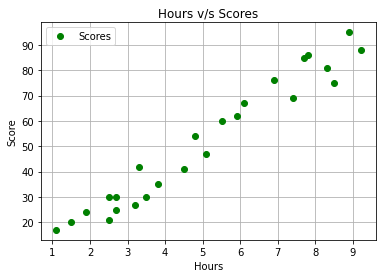

In [56]:
data.plot(x='Hours',y='Scores',style='go')
plt.title('Hours v/s Scores')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.grid(True)

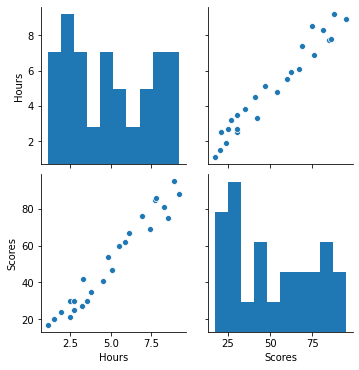

In [13]:
sns.pairplot(data);

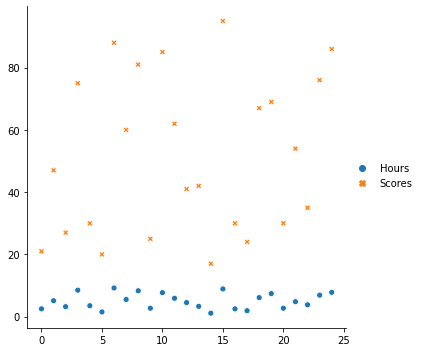

In [14]:
sns.relplot(data=data)

<Figure size 1440x576 with 0 Axes>

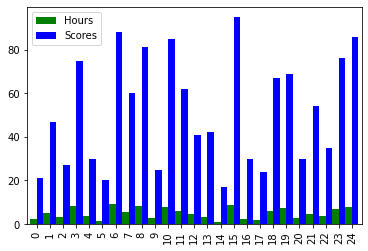

In [54]:

data.plot(kind='bar',color=("green","blue"),width=1)

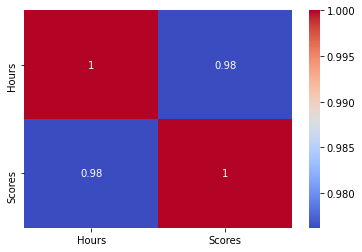

In [48]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

### Here we can see data is highly correlated i.e number of hours is directly proportional to score % 

In [7]:
x=data.iloc[:,:1].values
y=data.iloc[:,1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Now, we will apply linear regression to train the model and make further predictions

## Splitting the data into training and test sets

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


## Training the model using Linear regression

In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train) 


LinearRegression()

## Visualising the Training set 

Text(0, 0.5, 'Score')

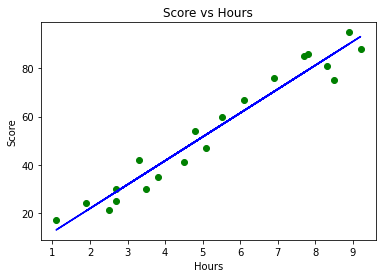

In [11]:
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title('Score vs Hours')
plt.xlabel('Hours')
plt.ylabel('Score')

## Using Straight Line Equation y = mx + c

In [13]:
line=model.coef_*x + model.intercept_

 ## Intercept and slope of the line

In [14]:
print("Slope of the Line is : ",model.coef_)
print("Intercept of the line is : " ,model.intercept_)

Slope of the Line is :  [9.91065648]
Intercept of the line is :  2.0181600414346974


## Plotting the regression line

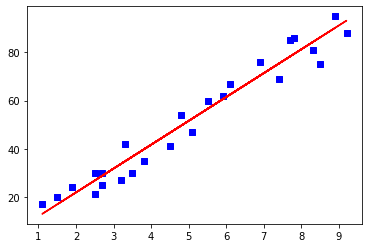

In [15]:
plt.scatter(x,y,color='b',marker="s")
plt.plot(x,line,color='r')

# Making Predictions

## We have trained our algorithm, it's time to make some predictions.

In [24]:
y_pred=model.predict(x_test).flatten()  
print(x_test)
print("y_pred=",y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y_pred= [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # Comparing Actual vs Predicted
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


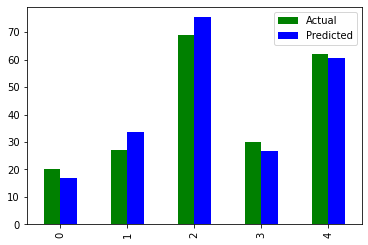

In [26]:
df.plot(kind='bar',color="gb")

## Visualising the Test set

Text(0, 0.5, 'Score')

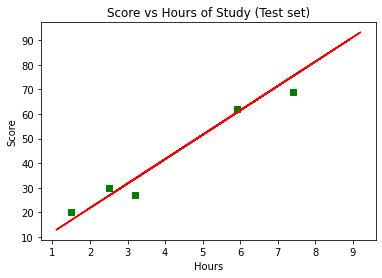

In [27]:
plt.scatter(x_test, y_test, color = 'green',marker='s')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.title('Score vs Hours of Study (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')


# Now You can also test with your own data

In [28]:
hours= 9.25
pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


# Calculating the error 

In [29]:
from sklearn.metrics import mean_absolute_error,r2_score  
print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_pred)) 
print(' r2 Score: ', r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
 r2 Score:  0.9454906892105355


#                              ----------THANK YOU SO MUCH----------